# Business Case: 24Seven
24Seven has different stores buying various products, based on the purchase history there is a requirement to divide the stores into classes for better inventory management and customer handling.

The column profile looks as follows,

| id | features | description |
| :-: | :-: | :-: |
|01| `Region` | Region of the store (1: Less purchase 2: frequent purchase 3: high purchase)|
|02| `Fresh` | How many fresh items are brought |
|03| `Milk` | How many units of Milk is purchased |
|04| `Grocery` | Units of Grocery bought for the store |
|05| `Frozen` | Frozen items purchased |
|06| `Detergents_Paper` | Unit of Detergents and paper bought |
|07| `Delicassen` | Food related items |
|08| `class` | Type/Category of the Store (1 ,2 , 3)|

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# loading the data
df = pd.read_csv("24_seven.csv")
df.head()

,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,class
0,3,12669,9656,7561,214,2674,1338,2
1,3,7057,9810,9568,1762,3293,1776,2
2,3,6353,8808,7684,2405,3516,7844,2
3,3,13265,1196,4221,6404,507,1788,1
4,3,22615,5410,7198,3915,1777,5185,1


In [3]:
# shape of the data
df.shape

(440, 8)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Region            440 non-null    int64
 1   Fresh             440 non-null    int64
 2   Milk              440 non-null    int64
 3   Grocery           440 non-null    int64
 4   Frozen            440 non-null    int64
 5   Detergents_Paper  440 non-null    int64
 6   Delicassen        440 non-null    int64
 7   class             440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


# EDA

In [5]:
# one hot encoding the "Region" column
df = pd.get_dummies(df, columns = ["Region"], dtype = int)
df.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,class,Region_1,Region_2,Region_3
0,12669,9656,7561,214,2674,1338,2,0,0,1
1,7057,9810,9568,1762,3293,1776,2,0,0,1
2,6353,8808,7684,2405,3516,7844,2,0,0,1
3,13265,1196,4221,6404,507,1788,1,0,0,1
4,22615,5410,7198,3915,1777,5185,1,0,0,1


In [6]:
# storing class label
class_labels = df["class"]
# one hot encoding the "class" column
df = pd.get_dummies(df, columns = ["class"], dtype = int)
df.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Region_1,Region_2,Region_3,class_1,class_2,class_3
0,12669,9656,7561,214,2674,1338,0,0,1,0,1,0
1,7057,9810,9568,1762,3293,1776,0,0,1,0,1,0
2,6353,8808,7684,2405,3516,7844,0,0,1,0,1,0
3,13265,1196,4221,6404,507,1788,0,0,1,1,0,0
4,22615,5410,7198,3915,1777,5185,0,0,1,1,0,0


In [7]:
x = df.drop(columns = ["class_1", "class_2", "class_3"])
y = df[["class_1", "class_2", "class_3"]]
x.shape, y.shape

((440, 9), (440, 3))

In [8]:
# visualizing the data using PCA
from sklearn.decomposition import PCA

# reducing the features to just 2 features
pca = PCA(n_components = 2)
visual_1 = pca.fit_transform(x)
visual_1.shape

(440, 2)

In [9]:
df2 = pd.DataFrame(visual_1, columns = ["f1", "f2"])
df2["y"] = class_labels
pca.explained_variance_ratio_

array([0.45961362, 0.40517227])

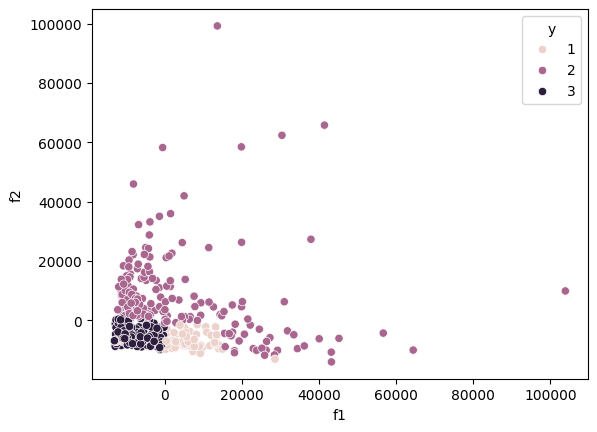

In [10]:
sns.scatterplot(data = df2, x = "f1", y = "f2", hue = "y")
plt.show()

Observe that the data is non-linear, hence to correctly classify the data, a deep neural network is required.

In [11]:
# splitting the data into train, test and validation sets
from sklearn.model_selection import train_test_split

x_train_val, x_test, y_train_val, y_test = train_test_split(x, y, test_size = 0.1, random_state = 42)
x_train, x_val, y_train, y_val = train_test_split(x_train_val, y_train_val, test_size = 0.1, random_state = 42)
x_train.shape, y_train.shape, x_val.shape, y_val.shape, x_test.shape, y_test.shape

((356, 9), (356, 3), (40, 9), (40, 3), (44, 9), (44, 3))

In [12]:
# standardizing the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_val = scaler.transform(x_val)
x_test = scaler.transform(x_test)

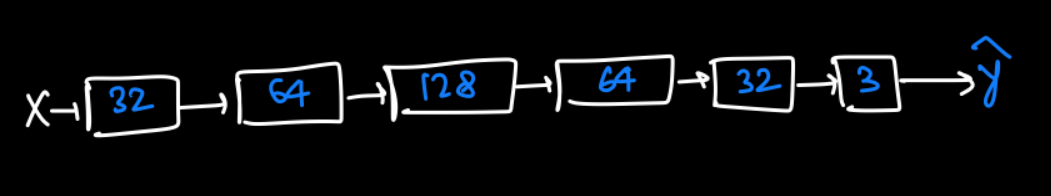

The above is a 7 layer Neural Network such that,

| layer | description |
| :-: | :-: |
| L1 | Input Layer |
| L2 | Contains 32 Neurons |
| L3 | Contains 64 Neurons |
| L4 | Contains 128 Neurons |
| L5 | Contains 64 Neurons |
| L6 | Contains 64 Neurons |
| L7 | Output Layer |

ReLU is used as the activation function between the layers.

In [13]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

np.random.seed(42)
tf.random.set_seed(42)

In [14]:
# create a baseline model
def baseline_model():
    model = Sequential(
        [
            Dense(32, activation = "relu", kernel_initializer = "glorot_uniform"),
            Dense(64, activation = "relu", kernel_initializer = "glorot_uniform"),
            Dense(128, activation = "relu", kernel_initializer = "glorot_uniform"),
            Dense(64, activation = "relu", kernel_initializer = "glorot_uniform"),
            Dense(32, activation = "relu", kernel_initializer = "glorot_uniform"),
            Dense(3, activation = "softmax")
        ]
    )

    return model

model = baseline_model()

In [15]:
# using minibatch gradient descent as optimizer
model.compile(
    optimizer = tf.keras.optimizers.SGD(),
    loss = tf.keras.losses.CategoricalCrossentropy()
)

In [16]:
# training a model with "epoch = 10" and "batch_size = 128"
history = model.fit(x_train, y_train, validation_data = (x_val, y_val), epochs = 10, batch_size = 128)

Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 1.0889 - val_loss: 1.0789
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 1.0794 - val_loss: 1.0679
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 1.0705 - val_loss: 1.0576
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 1.0621 - val_loss: 1.0479
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 1.0541 - val_loss: 1.0385
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 1.0463 - val_loss: 1.0296
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 1.0389 - val_loss: 1.0212
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 1.0318 - val_loss: 1.0129
Epoch 9/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 1.0250 - val_loss: 1.0049
Epoch 10/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 1.0184 - val_loss: 0.9972


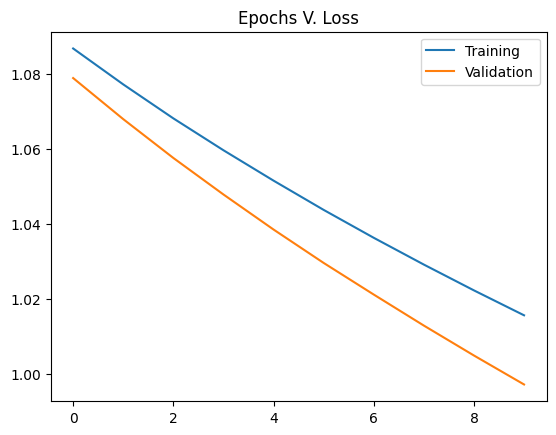

In [17]:
epochs = history.epoch
loss = history.history["loss"]
val_loss = history.history["val_loss"]
plt.plot(epochs, loss, label = "Training")
plt.plot(epochs, val_loss, label = "Validation")
plt.legend()
plt.title("Epochs V. Loss")
plt.show()

Observe that even after 10 epochs, the model still has very high loss.

### What should be done to make the model perform better?
Increasing the epochs of the model will help in improving the performance. Increasing the epoch of the model to 200

In [18]:
history = model.fit(x_train, y_train, validation_data = (x_val, y_val), epochs = 200, batch_size = 128, verbose = 0)

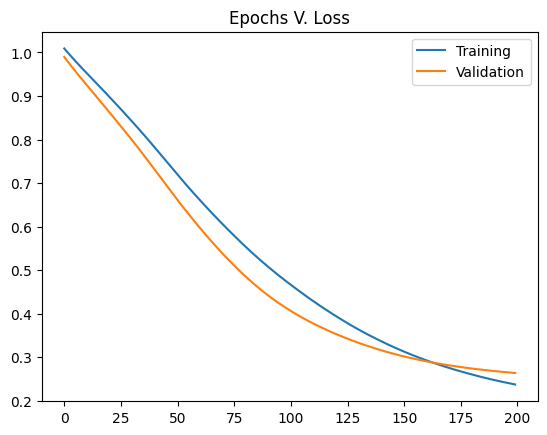

In [19]:
epochs = history.epoch
loss = history.history["loss"]
val_loss = history.history["val_loss"]
plt.plot(epochs, loss, label = "Training")
plt.plot(epochs, val_loss, label = "Validation")
plt.legend()
plt.title("Epochs V. Loss")
plt.show()

Observe that the model requires 200 epochs for to have such low loss.

Now consider that the dataset has 5 million samples,
- The model will require a very high training epochs.
- In order for it to reach minima.

This surely will be a huge drawback while deploying the model.

# Exponential Moving Average
### Why does mini-batch gradient descent take so many epochs?
Mini-batch gradient descent takes a few steps before reaching the global minima. In many of these steps, the optimizer tends to mode in the direction where it will never reach minima. Hence due to all these noisy steps, the gradient descent takes so many epochs.

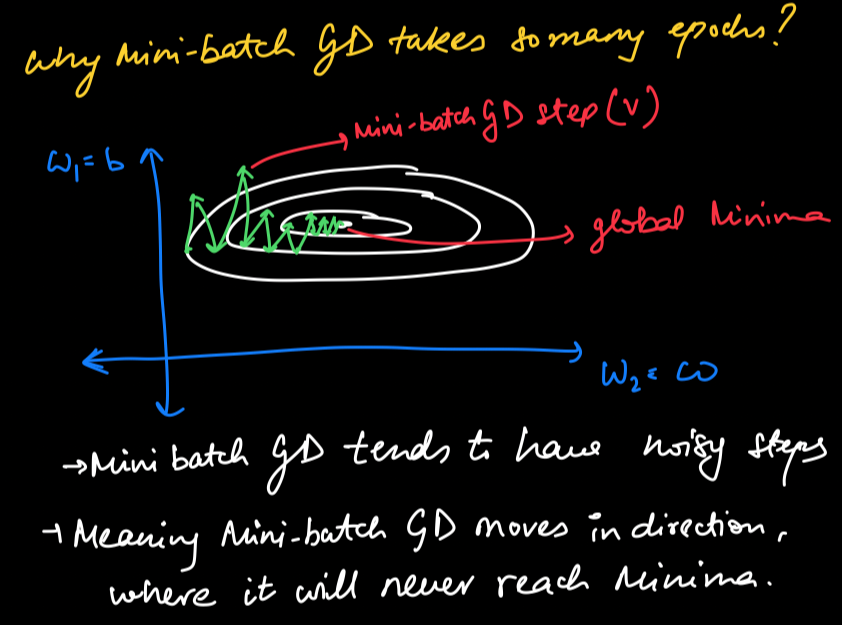

### Why does mini-batch gradient descent have noisy steps?
Since training data is divided into batches, for some batches the model has very small loss, while for a few batches, the loss is quite high. As a result, the weights have high and low values. Thus affecting the steps of mini-batch gradient descent optimizer.

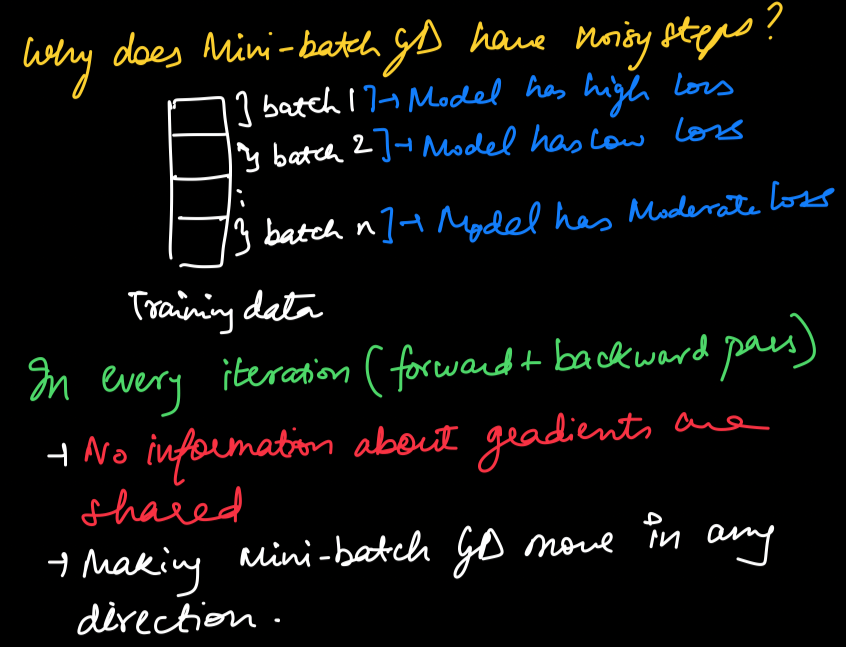

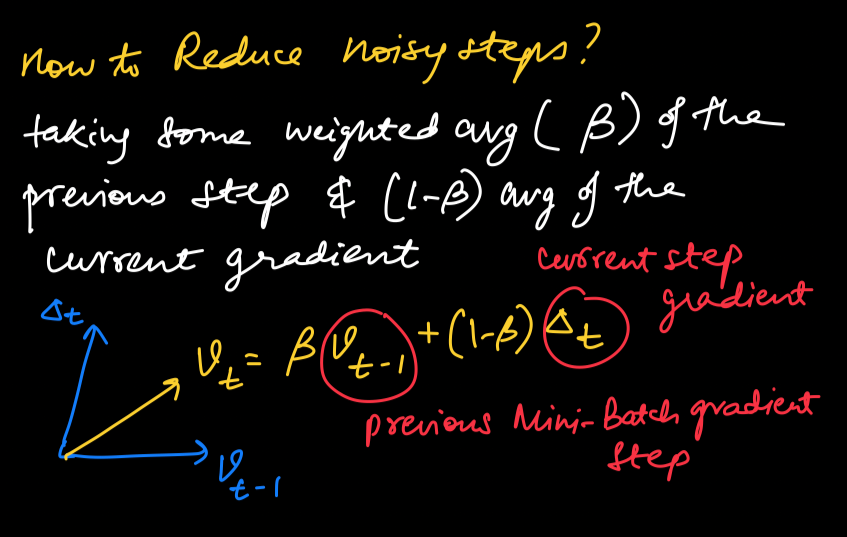

### How to reduce the number of epochs during the training of the model?
By decreasing the number of steps ($V$) optimization algorithm takes to reach the global minima.

### How can the algorithm be optimized to minimize the number of steps (V) required to reach the global minimum?
By incorporating past steps into the update process, the optimizer can be directed towards the global minimum.

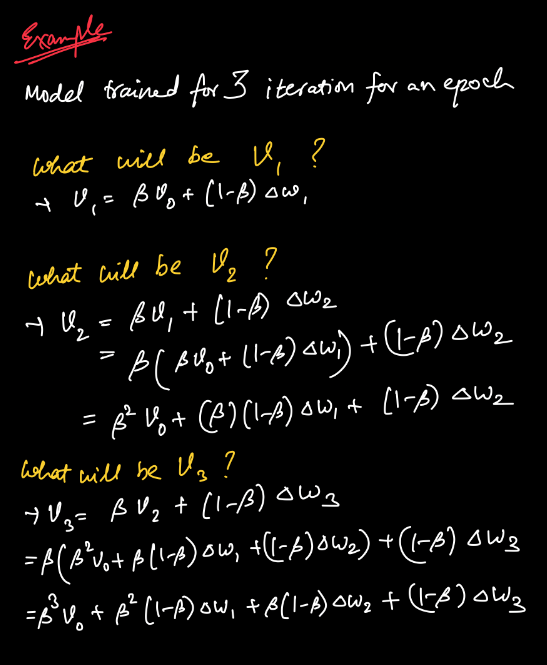

### Will combining the past steps taken by the optimizer help?
To understand this, consider a model trained for 3 iterations and 1 iteration = forward propagation + backward propagation. Where,
- $V_1 = \beta * V_0 + (1 - \beta) * \Delta w_1$.
- $V_2 = \beta^2 * V_0 + \beta * (1 - \beta) * \Delta w_1 + (1 - \beta) * \Delta w_2$.
- $V_3 = \beta^3 * V_0 + \beta^2 * (1 - \beta) * \Delta w_1 + \beta * (1 - \beta) * \Delta w_2 + (1 - \beta) * \Delta w_3$.

Thus using exponential moving average, the optimizer updates its direction according to the previous steps taken and smoothes out its current direction in order to reach global minima faster.

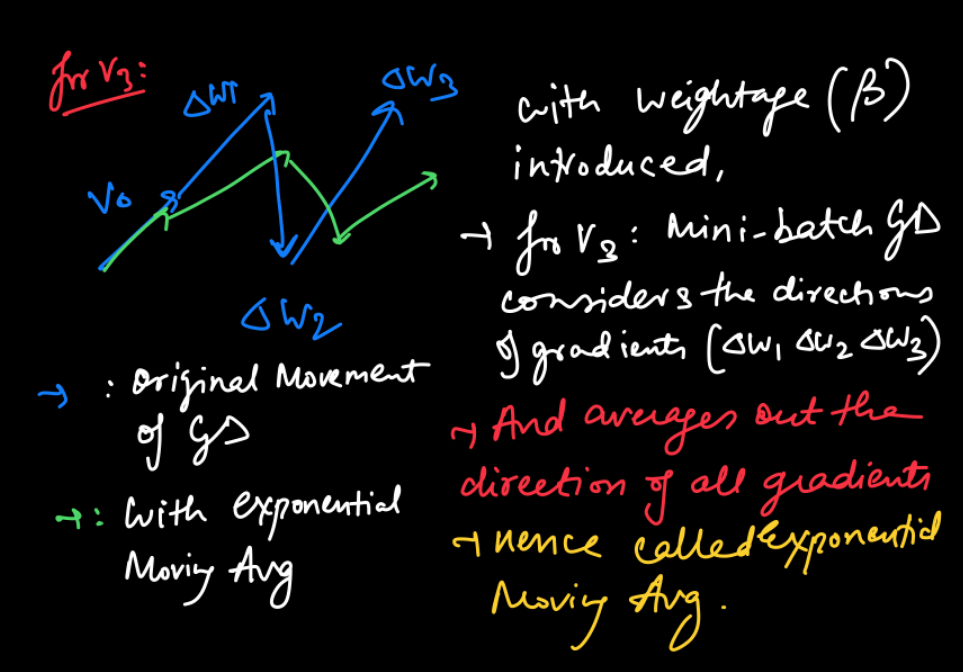

# Gradient Descent With Momentum

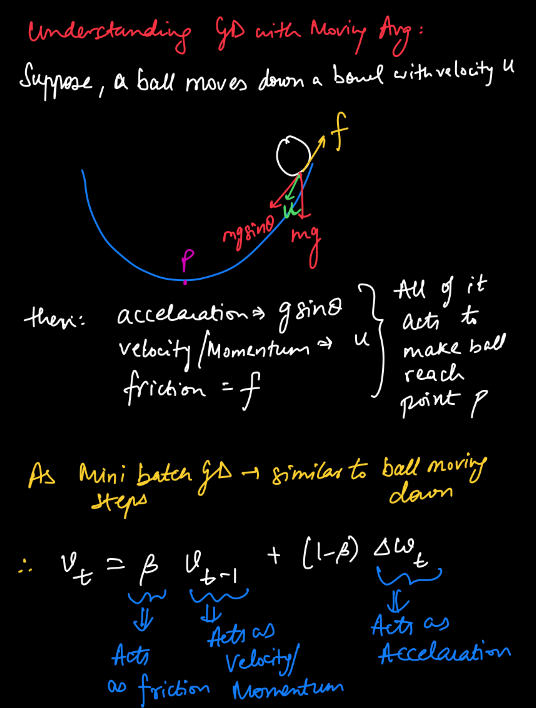

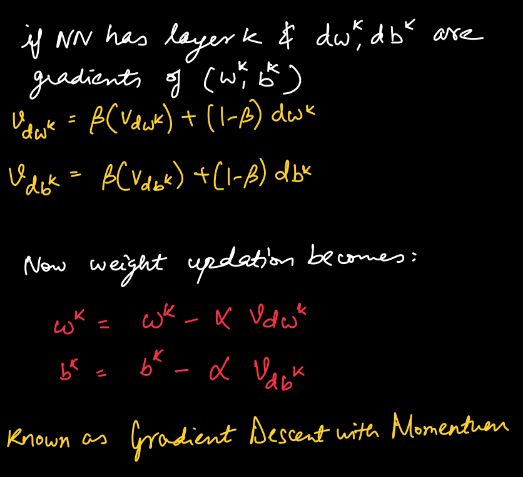

### How does gradient descent implement exponential moving average?
Gradient descent is a fundamental optimization algorithm which iteratively adjusts the parameters to minimize the loss function. However, it can often oscillate or get stuck in local minima. To address these issues, gradient descent with momentum introduces a concept borrowed from Physics called Momentum.

Momentum works in the following fashion,
1. Calculating exponentially weighted averages:
    - For each parameter (weight or bias), an exponentially weighted or exponentially moving average (EWA) of its gradient is computed.
    - This EMA, denoted as $V$, accumulated past gradients, giving more weight to recent ones.
    - The formula for updating the EMA is, $V_t = \beta * V_{(t - 1)} * \text{gradient}_{t}$.
    - Here, $\beta$ is the momentum parameter, typically set between 0.8 and 0.9. A higher $\beta$ gives more weight to past gradients.
2. Updating parameters:
    - The parameters are then updated using the current EMA: $\text{parameter} = \text{parameter} - \alpha * V_t$.
    - $\alpha$ is the learning rate, which controls the step size.

The Physics analogy,
- Gradient as acceleration: The gradient of the loss function as the acceleration, pushing the parameters downhill.
- EMA as velocity: The EMA, $V$, represents the velocity of the parameters. It smooths out the updates, preventing drastic changes in direction.
- Momentum parameter ($\beta$) as friction: The $\beta$ parameter acts as a form of friction, limiting the acceleration and preventing the parameters from overshooting the minimum.

Benefits of momentum,
1. Smoother updates: By incorporating past gradients, momentum reduces oscillations and speeds up the convergence.
2. Escaping by local minima: Momentum can help the optimizer escape shallow local minima by carrying the parameters through them.
3. Accelerated convergence: In regions with gentle slopes, momentum can significantly accelerate convergence.

Alternatively,

For some iteration $t$ and layer $k$ of the Neural Network, the exponential moving average is introduced after finding $dw^k$ and $db^k$
- $V_{dw^k} = \beta * V_{dw^k} + (1 - \beta) * dw^k$.
- $V_{db^k} = \beta * V_{db^k} + (1 - \beta) * db^k$.

Hence weight updation with learning rate $\alpha$ becomes,
- $w^k = w^k - \alpha * V_{dw^k}$.
- $b^k = b^k - \alpha * V_{db^k}$.

This approach can be analogous to a ball moving down a hill. Where,
- The gradients $dw^k$ and $db^k$ acts as acceleration.
- The $V_{dw}$ and $V_{db}$ acts as velocity with which the ball is moving.
- The term $\beta$ acts as friction and helps prevent the ball from speeding up without limit.

Hence, it can be said that, as the ball rolls down, it gains momentum. Therefore, this approach is called gradient descent with momentum.

### Implementation of gradient descent with momentum

In [20]:
model_gdm = baseline_model()

In [21]:
# using mini-batch gradient descent as the optimizer
model_gdm.compile(
    optimizer = tf.keras.optimizers.SGD(momentum = 0.9),
    loss = tf.keras.losses.CategoricalCrossentropy()
)

In [22]:
# training the model with "epoch = 50" and "batch_size = 128"
history = model_gdm.fit(x_train, y_train, validation_data = (x_val, y_val), epochs = 50, batch_size = 128, verbose = 0)

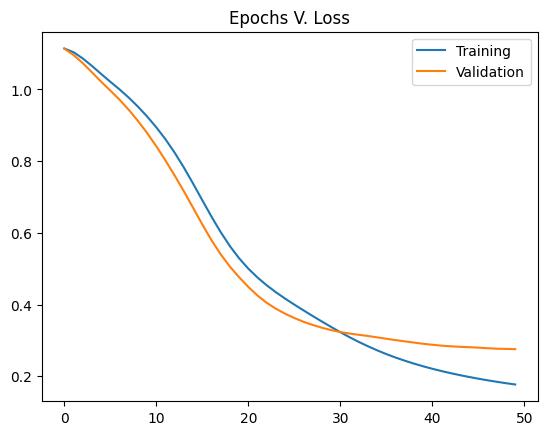

In [23]:
epochs = history.epoch
loss = history.history["loss"]
val_loss = history.history["val_loss"]
plt.plot(epochs, loss, label = "Training")
plt.plot(epochs, val_loss, label = "Validation")
plt.legend()
plt.title("Epochs V. Loss")
plt.show()

Observe that, by using momentum with gradient descent, the model was able to perform so much better in just 25 seconds.

# RMSprop
The 25 epochs are still quite high for real world data.

### Is there a way to further reduce the training epochs for the model?
Yes, there is.

The optimizer tends to adjust parameters with larger gradients more significantly, potentially leading to oscillations if the learning rate is too high or the loss surface is highly non-convex. Meaning, $\Delta b >> \Delta w$.

One of the challenges in training deep Neural Networks is the issue of oscillating gradients, especially when different parameters have vastly different scales. This can lead to slow convergence and unstable training.

RMSprop (Root Mean Square Propagation) is an optimization algorithm designed to address this problem. It adapts the learning rate for each parameter, effectively damping oscillations and accelerating convergence.

### How does RMSprop work?
1. Calculating exponentially weighted averages of squared gradients:
    - For each parameter, RMSprop calculates an exponentially weighted average of the square of its gradients.
    - This is similar to the momentum update, but instead of gradients, the squares of gradients are used.
    - This formula is,
        - $V_{dw^k} = \beta * V_{dw^k} + (1 - \beta) * (dw^k)^2$.
        - $V_{db^k} = \beta * V_{db^k} + (1 - \beta) * (db^k)^2$.
    - The $\beta$ parameter, typically between 0.9 and 0.99, conrtols the decay rate of the moving average.
2. Updating parameters:
    - The parameters are then updated using the formula,
        - $w^k = w^k - \alpha * \frac{dw^k}{\sqrt{V_{dw^k} + \epsilon}}$.
        - $b^k = b^k - \alpha * \frac{db^k}{\sqrt{V_{db^k} + \epsilon}}$.
    - $\epsilon$ is a small constant (e.g., 1e^8) added to the denominator to prevent division by 0.

### Intuition behind RMSprop
- Adaptive learning rates: By dividing the gradient by the root mean square of its past gradients, RMSprop effectively adapts the learning rate for each parameter.
- Damping oscillations: Large gradients lead to larger values in the denominator, effectively reducing the update step size. This helps to dampen oscillations.
- Accelerating convergence: For parameters with smaller gradients, the denominator becomes smaller, leading to larger update steps and faster convergence.

### Benefits of RMSprop
- Efficient convergence: RMSprop often converges faster than standard gradient descent and momentum.
- Handles noisy gradients: It is robust to noisy gradients and can handle problems with varying gradient scales.
- Effective for Deep Neural Networks: RMSprop is well-suited for training Deep Neural Networks, especially those with many layers and parameters.

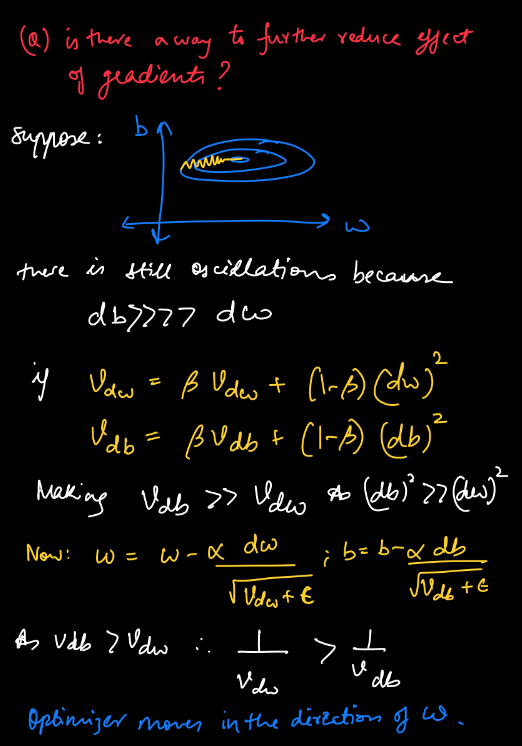

### Implementation of RMSprop

In [24]:
model_rms = baseline_model()

In [25]:
# using RMSprop as the optimizer
model_rms.compile(
    optimizer = tf.keras.optimizers.RMSprop(rho = 0.9),
    loss = tf.keras.losses.CategoricalCrossentropy()
)

In [26]:
# training the model with "epoch = 50" and "batch_size = 128"
history = model_rms.fit(x_train, y_train, validation_data = (x_val, y_val), epochs = 50, batch_size = 128, verbose = 0)

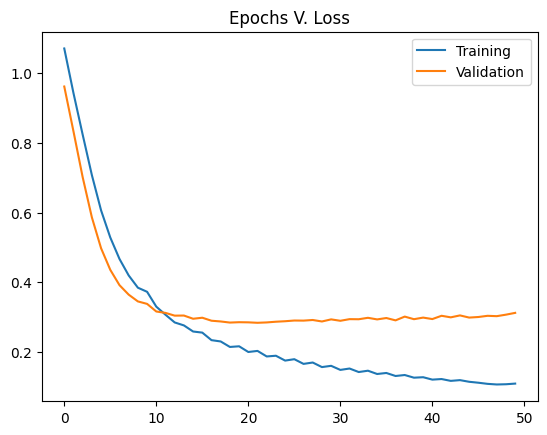

In [27]:
epochs = history.epoch
loss = history.history["loss"]
val_loss = history.history["val_loss"]
plt.plot(epochs, loss, label = "Training")
plt.plot(epochs, val_loss, label = "Validation")
plt.legend()
plt.title("Epochs V. Loss")
plt.show()

Observe that though RMSprop reaches minima within 10 training epochs, a lot of oscillations than gradient descent with momentum. Meaning, the optimizer still takes steps in the direction which is not towards global minima.

# Adam
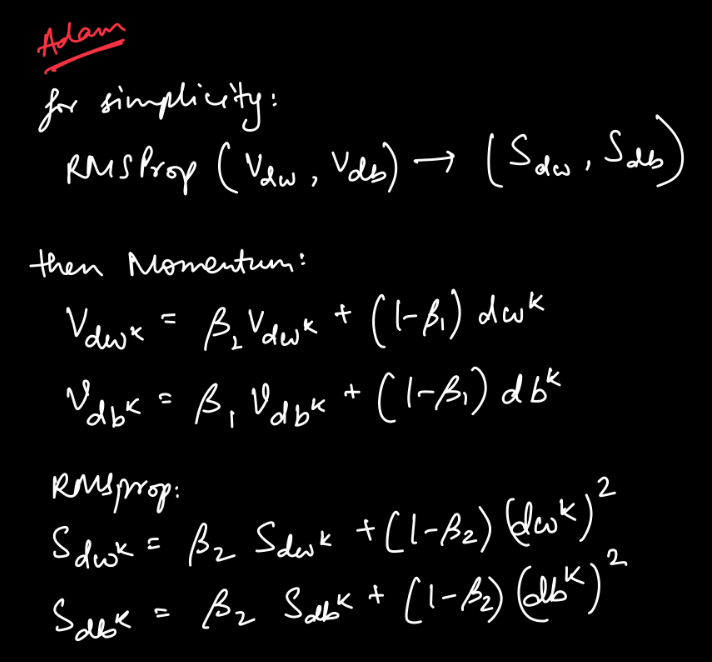

### Is there a way to reduce these oscillations while still keeping the training epochs low?
Yes, there is. Adam combines both Momentum and RMSprop.

Adam (Adaptive Moment Estimation) is a popular optimization algorithm that combines the best aspects of both Momentum and RMSprop. By effectively addressing the limitations of each, Adam offers significant advantages in terms of convergence speed and stability.

### How does Adam work?
1. Momentum:
    - Adam incorporates a momentum term similar to the one used in Momentum bases Gradient Descent.
    - This term, denoted as $V$, accumulates past gradients, giving more weight to recent ones.
    - The formula for updating the momentum term is,
        - $V_{dw^k} = \beta_1 * V_{dw^k} + (1 - \beta_1) * dw^k$.
        - $V_{db^k} = \beta_1 * V_{db^k} + (1 - \beta_1) * db^k$.
    - $\beta_1$ is the momentum decay rate, typically set to 0.9.
2. RMSprop:
    - Adam also incorporates the RMSprop update, which calculates the root mean square of the past gradients.
    - This term, denoted as $S$, helps to adapt the learning rate for each parameter.
    - The formula for updating the RMSprop term is,
        - $S_{dw^k} = \beta_2 * S_{dw^k} + (1 - \beta_2) * (dw^k)^2$.
        - $S_{db^k} = \beta_2 * S_{db^k} + (1 - \beta_2) * (db^k)^2$.
    - $\beta_2$ is the RMSprop decay rate, typically set to 0.999.
3. Parameter update:
    - Finally, the parameters are updated using the following formula,
        - $w^k = w^k - \alpha * \frac{V_{dw^k}}{\sqrt{S_{dw^k} + \epsilon}}$.
        - $b^k = b^k - \alpha * \frac{V_{db^k}}{\sqrt{S_{db^k} + \epsilon}}$.

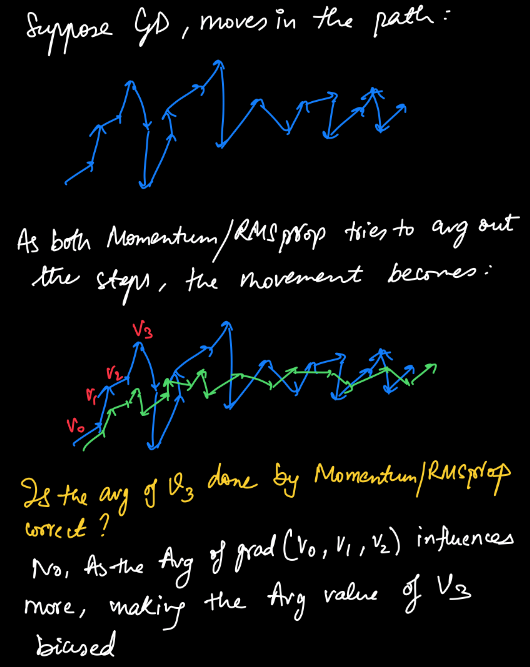

As exponential averaging assigns more weight to recent updates, the initial steps in the optimization process can significantly impact the direction and magnitude of future updates. This can result in a bias towards earlier gradient information, potentially slowing down convergence or leading to suboptimal solutions.

Meaning, for step $V_3$, the averaged value is more influenced by $V_0$, $V_1$, $V_2$, which makes the average value of $V_3$ biased and far away from the actual $V_3$.

### How to prevent this biasness?
The following is done to prevent this,

For momentum,
- $V^{corrected}_{dw^k} = \frac{V_{dw^k}}{1 - \beta_1^t}$.
- $V^{corrected}_{db^k} = \frac{V_{db^k}}{1 - \beta_1^t}$.

For RMSprop,
- $S^{corrected}_{dw^k} = \frac{S_{dw^k}}{1 - \beta_2^t}$.
- $S^{corrected}_{db^k} = \frac{S_{db^k}}{1 - \beta_2^t}$.

This process is called bias correction.

Finally, the weights are updated as,
- $w^k = w^k - \alpha * \frac{V_{dw}^{corrected}}{\sqrt{S_{dw}^{corrected} + \epsilon}}$.
- $b^k = b^k - \alpha * \frac{V_{db}^{corrected}}{\sqrt{S_{db}^{corrected} + \epsilon}}$.

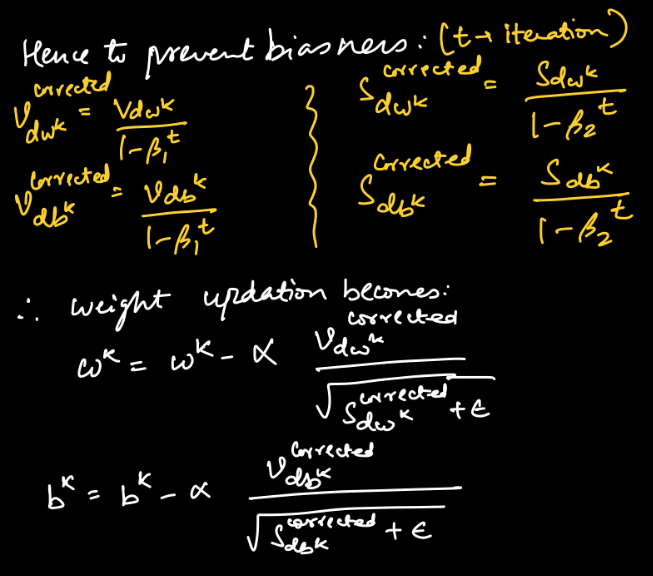

### Implementation of Adam

In [28]:
model_adam = baseline_model()

In [29]:
# using Adam as the optimizer
model_adam.compile(
    optimizer = tf.keras.optimizers.Adam(beta_1 = 0.9, beta_2 = 0.999),
    loss = tf.keras.losses.CategoricalCrossentropy()
)

In [30]:
# training the model with "epoch = 50" and "batch_size = 128"
history = model_adam.fit(x_train, y_train, validation_data = (x_val, y_val), epochs = 50, batch_size = 128, verbose = 0)

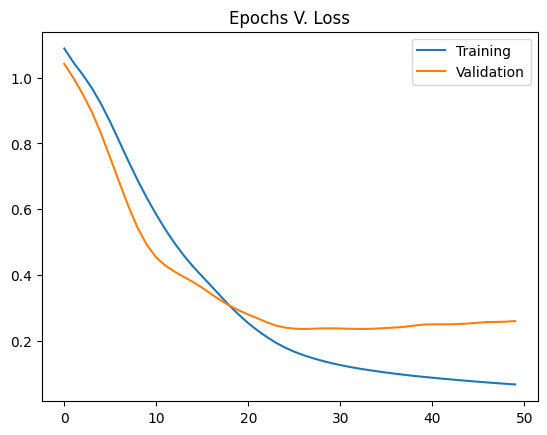

In [31]:
epochs = history.epoch
loss = history.history["loss"]
val_loss = history.history["val_loss"]
plt.plot(epochs, loss, label = "Training")
plt.plot(epochs, val_loss, label = "Validation")
plt.legend()
plt.title("Epochs V. Loss")
plt.show()

### Learning rate decay
Observe that by using Adam, the oscillations are reduced drastically. Also, the model takes almost 12 epochs for it to show accurate results. But, the model performance on the validation set is still low.

Is there a way to improve model performance?
- If the learning rate is high, the optimizer tends towards moving around the global minima.

Is a learning rate of 0.01 high for this problem?
- High learning rate speeds up the training, but validation loss stagnates around 0.4 (stuck near minima).

What happens if the learning rate is smaller?
- The number of steps increase and the model will require more epochs to reach global minima.

Learning rate decay dynamically adjusts the learning rate during training. A high initial learning rate allows for rapid exploration of the loss landscape, while a gradual decrease helps the optimizer converge more precisely on the global minimum.

It works as follows,
1. Initial high learning rate: Start with a relatively high learning rate ($\alpha_0$) to quickly move towards the vicinity of the minimum.
2. Gradual decrease: As training progresses (with each epoch $e$), the learning rate is reduced by a decay rate ($r_0$). The formula, $\alpha = \frac{\alpha_0}{1 + r_0 * e}$.

Learning rate decay is ideally implemented after an epoch using `tensorflow.keras.callbacks.LearningRateScheduler`.

In [32]:
from tensorflow.keras.callbacks import LearningRateScheduler

# defining learning rate decay
def scheduler(epochs, lr):
    r_0 = 0.01
    lr = (1/ (1 + r_0 * epochs)) * lr

    return lr

LRdecay = LearningRateScheduler(scheduler)

model_adam = baseline_model()

# using Adam as the optimizer
model_adam.compile(
    optimizer = tf.keras.optimizers.Adam(beta_1 = 0.9, beta_2 = 0.999),
    loss = tf.keras.losses.CategoricalCrossentropy()
)

# training the model with "epochs = 50" and "batch_size = 128"
history = model_adam.fit(x_train, y_train, validation_data = (x_val, y_val), epochs = 50, batch_size = 128, callbacks = [LRdecay], verbose = 0)

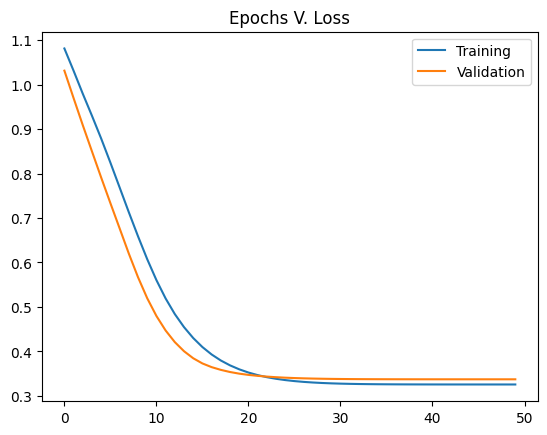

In [33]:
epochs = history.epoch
loss = history.history["loss"]
val_loss = history.history["val_loss"]
plt.plot(epochs, loss, label = "Training")
plt.plot(epochs, val_loss, label = "Validation")
plt.legend()
plt.title("Epochs V. Loss")
plt.show()

Observe that, by using learning rate decay, the model reaches a loss of around 0.3 now. Showing that reducing the learning rate did help to improve the model's performance.